In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, models,layers,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
(X_train,y_train), (X_test, y_test)= datasets.cifar10.load_data()

X_test.shape

(10000, 32, 32, 3)

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
#normalise pixel value to [0,1]
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0


In [5]:
#one hot encoder coversion
y_train=to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [6]:
#data augmentation
data_augmentation=Sequential([

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1)
])


In [7]:
model=Sequential([
    layers.Input(shape=(32,32,3)),
    data_augmentation,

    layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [8]:
# COMPILE WITH MATCHING LOSS:
if y_train.ndim == 2:
    loss = 'categorical_crossentropy'
else:
    loss = 'sparse_categorical_crossentropy'

model.compile(optimizer='adam',
             loss=loss,
             metrics=['accuracy'])

In [9]:
#defnining callbacks
earlystop= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint=ModelCheckpoint('best_model_cifar10.h5', monitor='val_accuracy',save_best_only=True, mode='max')

In [11]:
#train model
history=model.fit(X_train,y_train,
                  epochs=5,
                  batch_size=64,
                  validation_split=0.2,
                  callbacks=[earlystop, checkpoint])

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.6992 - loss: 0.8787 - val_accuracy: 0.7220 - val_loss: 0.8065
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7008 - loss: 0.8603

625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.7008 - loss: 0.8603 - val_accuracy: 0.7682 - val_loss: 0.6761
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.7088 - loss: 0.8407 - val_accuracy: 0.7626 - val_loss: 0.7000
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.7181 - loss: 0.8179 - val_accuracy: 0.7636 - val_loss: 0.6951
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.7320 - loss: 0.7896 - val_accuracy: 0.7653 - val_loss: 0.6670


In [13]:
#evaluate

model.load_weights('best_model_cifar10.h5')
test_loss, test_acc= model.evaluate(X_test,y_test)
print("\nTest Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7606 - loss: 0.6909

Test Accuracy: {test_acc*100:.2f}%


In [14]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

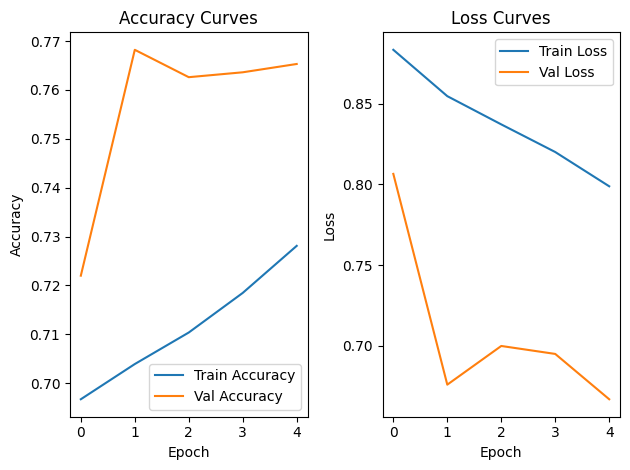

In [15]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


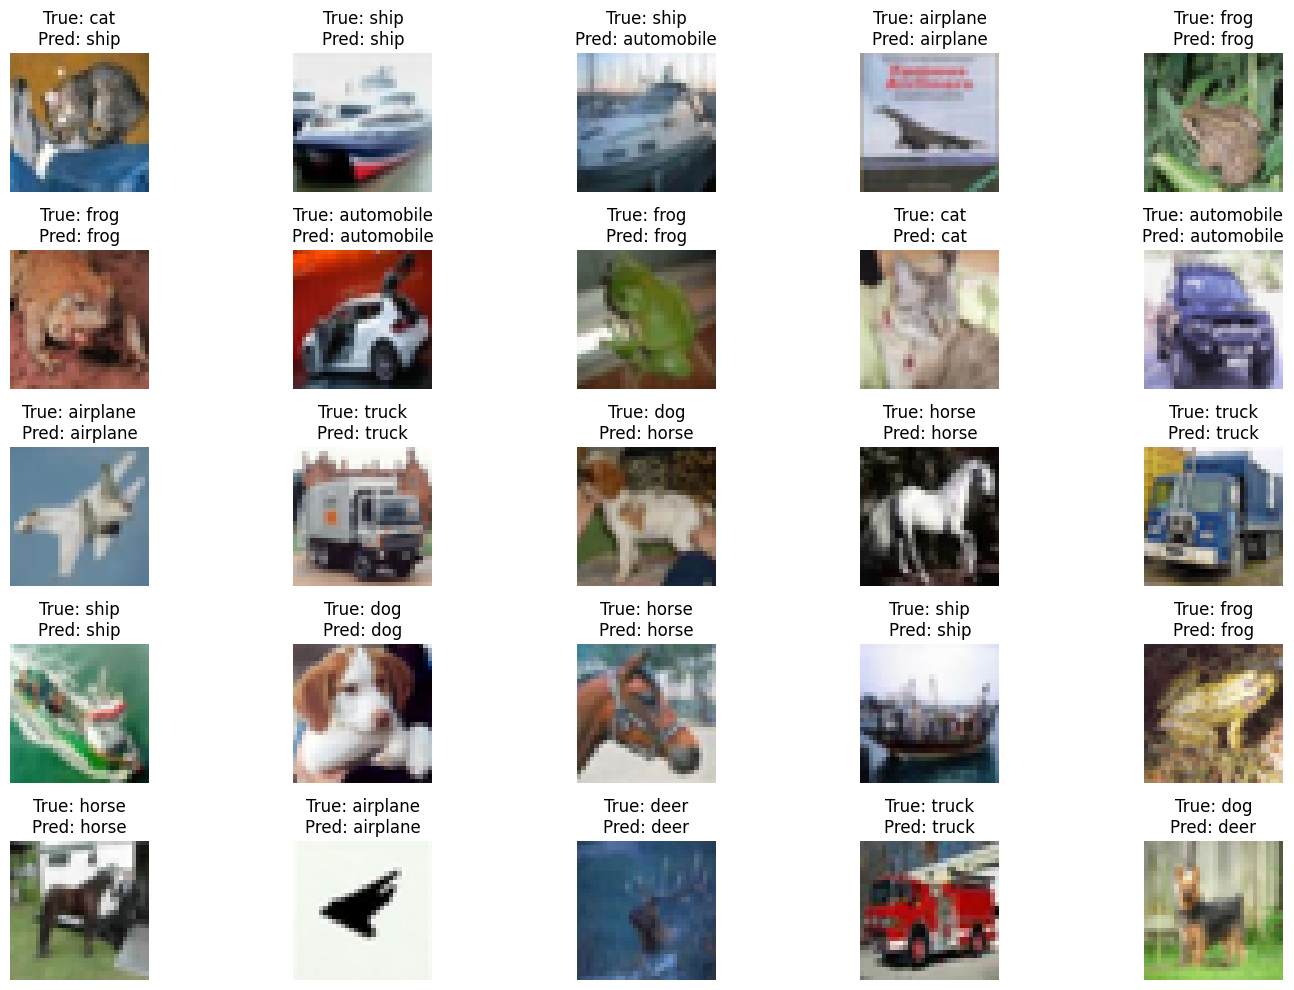

In [18]:

# Step 9: Make Predictions and Visualize Results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Convert one-hot encoded labels back to integers
y_test_labels = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Visualize sample predictions
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {class_names[y_test_labels[i]]}\nPred: {class_names[y_pred_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()